In [1]:
import pandas as pd

# Aggression Dataset

In [2]:
path = '/Ml files/cyberbully detection/'
aggression_df=pd.read_csv(path + "Initial files/aggression_parsed_dataset.csv")
aggression_df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,`- This is not ``creative``. Those are the di...,0.900000,0.100000,0
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,0
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0
4,4,This page will need disambiguation.,1.000000,0.000000,0


In [3]:
aggression_df = aggression_df.rename(columns={'ed_label_0': 'non_aggressive_confidence','ed_label_1': 'aggressive_confidence','oh_label': 'aggressive_label'})
aggression_df.aggressive_label = aggression_df.aggressive_label.map({0:'non_aggressive', 1:'aggresssive'})
aggression_df.head()

,index,Text,non_aggressive_confidence,aggressive_confidence,aggressive_label
0,0,`- This is not ``creative``. Those are the di...,0.900000,0.100000,non_aggressive
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,non_aggressive
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,non_aggressive
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,non_aggressive
4,4,This page will need disambiguation.,1.000000,0.000000,non_aggressive


In [4]:
aggression_df.shape

(115864, 5)

# Attack Dataset

In [5]:
attack_df=pd.read_csv(path + "Initial files/attack_parsed_dataset.csv")
attack_df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,`- This is not ``creative``. Those are the di...,1.000000,0.000000,0
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,0
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0
4,4,This page will need disambiguation.,1.000000,0.000000,0


In [6]:
attack_df = attack_df.rename(columns={'ed_label_0': 'non_attack_confidence','ed_label_1': 'attack_confidence','oh_label': 'attack_label'})
attack_df.attack_label = attack_df.attack_label.map({0:'non_attack', 1:'attack'})
attack_df.head()

,index,Text,non_attack_confidence,attack_confidence,attack_label
0,0,`- This is not ``creative``. Those are the di...,1.000000,0.000000,non_attack
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,non_attack
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,non_attack
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,non_attack
4,4,This page will need disambiguation.,1.000000,0.000000,non_attack


In [7]:
attack_df.shape

(115864, 5)

In [8]:
df1 = pd.merge(aggression_df, attack_df,on='index', how='outer')
df1.head()

,index,Text_x,non_aggressive_confidence,aggressive_confidence,aggressive_label,Text_y,non_attack_confidence,attack_confidence,attack_label
0,0,`- This is not ``creative``. Those are the di...,0.900000,0.100000,non_aggressive,`- This is not ``creative``. Those are the di...,1.000000,0.000000,non_attack
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,non_aggressive,` :: the term ``standard model`` is itself le...,1.000000,0.000000,non_attack
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,non_aggressive,"True or false, the situation as of March 200...",1.000000,0.000000,non_attack
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,non_aggressive,"Next, maybe you could work on being less cond...",0.555556,0.444444,non_attack
4,4,This page will need disambiguation.,1.000000,0.000000,non_aggressive,This page will need disambiguation.,1.000000,0.000000,non_attack


In [9]:
drop_cols = ['non_aggressive_confidence','aggressive_confidence','Text_y','non_attack_confidence','attack_confidence']
df1=df1.drop(columns=drop_cols)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115864 entries, 0 to 115863
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             115864 non-null  int64 
 1   Text_x            115864 non-null  object
 2   aggressive_label  115864 non-null  object
 3   attack_label      115864 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.4+ MB


# Toxicity dataset


In [10]:
toxicity_df=pd.read_csv(path + "/Initial files/toxicity_parsed_dataset.csv")
toxicity_df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.9,0.1,0
1,1,` :Clarification for you (and Zundark's righ...,1.0,0.0,0
2,2,Elected or Electoral? JHK,1.0,0.0,0
3,3,`This is such a fun entry. Devotchka I once...,1.0,0.0,0
4,4,Please relate the ozone hole to increases in c...,0.8,0.2,0


In [11]:
toxicity_df = toxicity_df.rename(columns={'ed_label_0': 'non_toxicity_confidence','ed_label_1': 'toxicity_confidence','oh_label': 'toxicity_label'})
toxicity_df.toxicity_label = toxicity_df.toxicity_label.map({0:'non_toxic', 1:'toxic'})
toxicity_df.toxicity_label.value_counts()

non_toxic    144324
toxic         15362
Name: toxicity_label, dtype: int64

In [12]:
toxicity_df.shape

(159686, 5)

In [13]:
not_in_df1 = df1.loc[~df1['Text_x'].isin(toxicity_df['Text']), :]

in_toxicity = toxicity_df.loc[toxicity_df['Text'].isin(df1['Text_x']), :]

print(len(not_in_df1))
print(len(in_toxicity))

36921
78973


In [14]:
in_toxicity

,index,Text,non_toxicity_confidence,toxicity_confidence,toxicity_label
8,8,`- This is not ``creative``. Those are the di...,0.8,0.2,non_toxic
48,48,Ummm. The article uses imperial measuremen...,0.9,0.1,non_toxic
54,54,::I disagree. I would leave it out of the in...,0.8,0.2,non_toxic
57,57,:::I don't know where you got the idea that ...,1.0,0.0,non_toxic
98,98,MarcusAurelius]] Why exactly was this user b...,0.9,0.1,non_toxic
...,...,...,...,...,...
159681,159681,` These sources don't exactly exude a sense ...,1.0,0.0,non_toxic
159682,159682,The Institute for Historical Review is a pee...,1.0,0.0,non_toxic
159683,159683,:The way you're trying to describe it in this...,1.0,0.0,non_toxic
159684,159684,== Warning == There is clearly a protection...,0.6,0.4,non_toxic


In [15]:
df1=df1.rename(columns={'Text_x':'Text'})
df1 = pd.merge(df1,toxicity_df,how='inner', on='Text')
df1.head()

,index_x,Text,aggressive_label,attack_label,index_y,non_toxicity_confidence,toxicity_confidence,toxicity_label
0,0,`- This is not ``creative``. Those are the di...,non_aggressive,non_attack,8,0.8,0.2,non_toxic
1,24,Ummm. The article uses imperial measuremen...,non_aggressive,non_attack,48,0.9,0.1,non_toxic
2,30,::I disagree. I would leave it out of the in...,non_aggressive,non_attack,54,0.8,0.2,non_toxic
3,33,:::I don't know where you got the idea that ...,non_aggressive,non_attack,57,1.0,0.0,non_toxic
4,50,MarcusAurelius]] Why exactly was this user b...,non_aggressive,non_attack,98,0.9,0.1,non_toxic


In [16]:
drop_cols=['non_toxicity_confidence','toxicity_confidence','index_y','index_x']
df1=df1.drop(columns=drop_cols)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80273 entries, 0 to 80272
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Text              80273 non-null  object
 1   aggressive_label  80273 non-null  object
 2   attack_label      80273 non-null  object
 3   toxicity_label    80273 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


# twitter_parsed_dataset

In [17]:
twitter_cb_df=pd.read_csv(path + "/Initial files/twitter_parsed_dataset.csv")
twitter_cb_df.head()

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


In [18]:
twitter_cb_df.oh_label.value_counts()

0.0    11501
1.0     5347
Name: oh_label, dtype: int64

In [19]:
twitter_cb_df = twitter_cb_df.rename(columns={'oh_label': 'sexism_recism_label'})
twitter_cb_df.bully_label = twitter_cb_df.sexism_recism_label.map({0:'non sexism or recism', 1:'sexism or recism'})
twitter_cb_df.bully_label.value_counts()

C:\Users\Ovi\anaconda3\envs\tensrgpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


non sexism or recism    11501
sexism or recism         5347
Name: sexism_recism_label, dtype: int64

In [20]:
#df2 = pd.merge(df2, twitter_cb_df,on='id', how='outer')
df2=twitter_cb_df
df2.head()

,index,id,Text,Annotation,sexism_recism_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


In [21]:
drop_cols=['index','Annotation','id']
df2=df2.drop(columns=drop_cols)

In [22]:
#df=pd.merge(df1, df2,on='Text', how='outer')
df = df1.append(df2)

In [23]:
len(df.Text.unique())

95608

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97124 entries, 0 to 16850
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Text                 97123 non-null  object 
 1   aggressive_label     80273 non-null  object 
 2   attack_label         80273 non-null  object 
 3   toxicity_label       80273 non-null  object 
 4   sexism_recism_label  16848 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


In [25]:
df

,Text,aggressive_label,attack_label,toxicity_label,sexism_recism_label
0,`- This is not ``creative``. Those are the di...,non_aggressive,non_attack,non_toxic,NaN
1,Ummm. The article uses imperial measuremen...,non_aggressive,non_attack,non_toxic,NaN
2,::I disagree. I would leave it out of the in...,non_aggressive,non_attack,non_toxic,NaN
3,:::I don't know where you got the idea that ...,non_aggressive,non_attack,non_toxic,NaN
4,MarcusAurelius]] Why exactly was this user b...,non_aggressive,non_attack,non_toxic,NaN
...,...,...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",NaN,NaN,NaN,0.0
16847,#MKR 'pretty good dishes we're happy with' - O...,NaN,NaN,NaN,0.0
16848,RT @colonelkickhead: Deconstructed lemon tart!...,NaN,NaN,NaN,0.0
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,NaN,NaN,NaN,0.0


In [26]:
#parcentagewise null values
def missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data_table(df)

,Total,Percent
sexism_recism_label,80276,0.826531
aggressive_label,16851,0.173500
attack_label,16851,0.173500
toxicity_label,16851,0.173500
Text,1,0.000010


In [27]:
df.dropna(subset = ["Text"], inplace=True)

In [28]:
df.aggressive_label = df.aggressive_label.map({'non_aggressive':0, 'aggresssive':1})
df.attack_label = df.attack_label.map({'non_attack':0, 'attack':1})
df.toxicity_label = df.toxicity_label.map({'non_toxic':0, 'toxic':1})
df = df.fillna(0)

In [29]:
missing_data_table(df)

,Total,Percent
Text,0,0.0
aggressive_label,0,0.0
attack_label,0,0.0
toxicity_label,0,0.0
sexism_recism_label,0,0.0


In [30]:
df.tail(10)

,Text,aggressive_label,attack_label,toxicity_label,sexism_recism_label
16841,yeah so annoying how they're doing their jobs ...,0.0,0.0,0.0,1.0
16842,Kat and Andre are now more hated than Adam and...,0.0,0.0,0.0,0.0
16843,@jukes303 The old oil cliche again. The US pay...,0.0,0.0,0.0,0.0
16844,@Mora_Fornelli An enemy of @clementine_ford is...,0.0,0.0,0.0,1.0
16845,"Soz my kitchen rules I've lost interest, the i...",0.0,0.0,0.0,0.0
16846,"Feeling so sorry for the girls, they should be...",0.0,0.0,0.0,0.0
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0,0.0,0.0,0.0
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,0.0,0.0,0.0
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,0.0,0.0,0.0
16850,"And before you protest that you're *not* mad, ...",0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='variable', ylabel='count'>

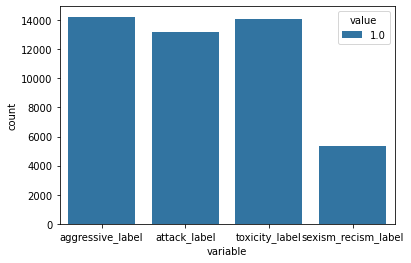

In [31]:
import seaborn as sns
y=df.iloc[:,1:5]
count_of_bully = pd.melt(y)
sns.countplot(data=count_of_bully.loc[count_of_bully['value']!=0], x='variable', hue='value')

In [32]:
df.shape

(97123, 5)

In [33]:
len(df.Text.unique())

95607

In [34]:
df=df.drop_duplicates(subset=['Text'])

In [35]:
df.shape

(95607, 5)

In [36]:
df.to_csv(path + "/Dataset/cyber_bully.csv", sep=',', index=False)